In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## * Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [4]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(25)

,Total,Percent
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945
garagetype,81,5.547945
garagefinish,81,5.547945


* The top 5 features have greater than 47% missing values.
* These items appear to not be features that homebuyers use to value a purchase.
* poolqc, miscfeature, alley, fence, fireplacequ - columns will be removed

In [6]:
df = df.drop(['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ'], axis=1)

In [7]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'o

In [8]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

* I will fill the rest of the missing data with the respective means.

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(25)

,Total,Percent
garagetype,81,5.547945
garagefinish,81,5.547945
garagequal,81,5.547945
garagecond,81,5.547945
bsmtexposure,38,2.602740
bsmtfintype2,38,2.602740
bsmtfintype1,37,2.534247
bsmtqual,37,2.534247
bsmtcond,37,2.534247
masvnrtype,8,0.547945


* The amount of missing values has been greatly reduced.
* The remaining variables with missing values are of 'object' type and will be filled with their respective modes.

In [11]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_values.head(12)

,Total,Percent
id,0,0.0
fullbath,0,0.0
fireplaces,0,0.0
functional,0,0.0
totrmsabvgrd,0,0.0
kitchenqual,0,0.0
kitchenabvgr,0,0.0
bedroomabvgr,0,0.0
halfbath,0,0.0
bsmthalfbath,0,0.0


In [13]:
df.duplicated().sum()

0

* There is no duplicate data.

## * Exploratory Data Analysis and Feature Engineering

In [14]:
# Create List of Non-Numeric/Categorical Columns

categorical_columns = df.select_dtypes(['object']).columns
print(categorical_columns)
print(f"The number of categorical columns is {len(categorical_columns)}")

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'saletype', 'salecondition'],
      dtype='object')
The number of categorical columns is 38


In [15]:
# Create List of Numeric Columns

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


### The Target variable is 'saleprice'

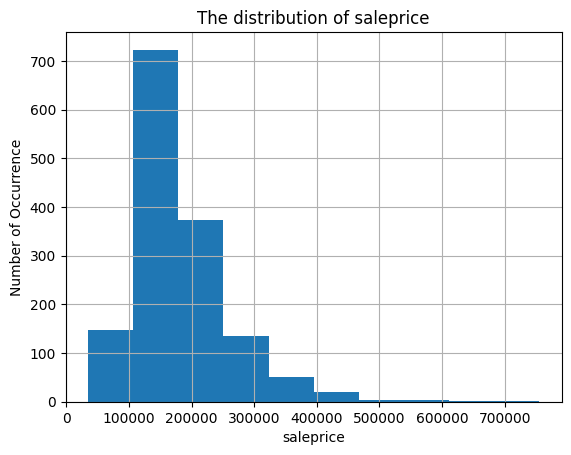

In [16]:
df.saleprice.hist()
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("Number of Occurrence")
plt.show()

* The Target variable has skewed right distribution

In [17]:
df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

In [18]:
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   lotfrontage    1460 non-null   float64
 3   lotarea        1460 non-null   int64  
 4   overallqual    1460 non-null   int64  
 5   overallcond    1460 non-null   int64  
 6   yearbuilt      1460 non-null   int64  
 7   yearremodadd   1460 non-null   int64  
 8   masvnrarea     1460 non-null   float64
 9   bsmtfinsf1     1460 non-null   int64  
 10  bsmtfinsf2     1460 non-null   int64  
 11  bsmtunfsf      1460 non-null   int64  
 12  totalbsmtsf    1460 non-null   int64  
 13  firstflrsf     1460 non-null   int64  
 14  secondflrsf    1460 non-null   int64  
 15  lowqualfinsf   1460 non-null   int64  
 16  grlivarea      1460 non-null   int64  
 17  bsmtfullbath   1460 non-null   int64  
 18  bsmthalf

### Checking for outliers

In [19]:
for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val) 
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) | 
                                                    (df[col] < min_val))[0]))*100/1460))

Number of outliers for id is: 0 and it is 0.0 percent.
Number of outliers for mssubclass is: 103 and it is 7.054794520547945 percent.
Number of outliers for lotfrontage is: 106 and it is 7.260273972602739 percent.
Number of outliers for lotarea is: 69 and it is 4.726027397260274 percent.
Number of outliers for overallqual is: 2 and it is 0.136986301369863 percent.
Number of outliers for overallcond is: 125 and it is 8.561643835616438 percent.
Number of outliers for yearbuilt is: 7 and it is 0.4794520547945205 percent.
Number of outliers for yearremodadd is: 0 and it is 0.0 percent.
Number of outliers for masvnrarea is: 98 and it is 6.712328767123288 percent.
Number of outliers for bsmtfinsf1 is: 7 and it is 0.4794520547945205 percent.
Number of outliers for bsmtfinsf2 is: 167 and it is 11.438356164383562 percent.
Number of outliers for bsmtunfsf is: 29 and it is 1.9863013698630136 percent.
Number of outliers for totalbsmtsf is: 61 and it is 4.178082191780822 percent.
Number of outliers

In [20]:
df[numeric_columns].corr().loc[:,"saleprice"].sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.475241
garageyrblt      0.470177
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

* I will be checking the variables with a corr above 55%
* The variables are: 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath'.
* I will check for outliers for the above variables and the Target variable using the Tukey method.
* 'fullbath' has no outliers

In [21]:
q75, q25 = np.percentile(df["saleprice"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["saleprice"] > max_val) 
                      | (df["saleprice"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 121
The score threshold is: 1.5
Number of outliers is: 61
The score threshold is: 2.0
Number of outliers is: 38
The score threshold is: 2.5
Number of outliers is: 21
The score threshold is: 3.0
Number of outliers is: 12
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 7
The score threshold is: 4.5
Number of outliers is: 4


In [22]:
q75, q25 = np.percentile(df["grlivarea"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["grlivarea"] > max_val) 
                      | (df["grlivarea"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 83
The score threshold is: 1.5
Number of outliers is: 31
The score threshold is: 2.0
Number of outliers is: 18
The score threshold is: 2.5
Number of outliers is: 9
The score threshold is: 3.0
Number of outliers is: 4
The score threshold is: 3.5
Number of outliers is: 4
The score threshold is: 4.0
Number of outliers is: 3
The score threshold is: 4.5
Number of outliers is: 1


In [23]:
q75, q25 = np.percentile(df["overallqual"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["overallqual"] > max_val) 
                      | (df["overallqual"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 23
The score threshold is: 1.5
Number of outliers is: 2
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [24]:
q75, q25 = np.percentile(df["garagecars"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["garagecars"] > max_val) 
                      | (df["garagecars"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 5
The score threshold is: 1.5
Number of outliers is: 5
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [25]:
q75, q25 = np.percentile(df["garagearea"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["garagearea"] > max_val) 
                      | (df["garagearea"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 187
The score threshold is: 1.5
Number of outliers is: 21
The score threshold is: 2.0
Number of outliers is: 8
The score threshold is: 2.5
Number of outliers is: 5
The score threshold is: 3.0
Number of outliers is: 3
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [26]:
q75, q25 = np.percentile(df["totalbsmtsf"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["totalbsmtsf"] > max_val) 
                      | (df["totalbsmtsf"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 107
The score threshold is: 1.5
Number of outliers is: 61
The score threshold is: 2.0
Number of outliers is: 11
The score threshold is: 2.5
Number of outliers is: 6
The score threshold is: 3.0
Number of outliers is: 5
The score threshold is: 3.5
Number of outliers is: 5
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 1


In [27]:
q75, q25 = np.percentile(df["firstflrsf"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["firstflrsf"] > max_val) 
                      | (df["firstflrsf"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 59
The score threshold is: 1.5
Number of outliers is: 20
The score threshold is: 2.0
Number of outliers is: 9
The score threshold is: 2.5
Number of outliers is: 4
The score threshold is: 3.0
Number of outliers is: 3
The score threshold is: 3.5
Number of outliers is: 2
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 1


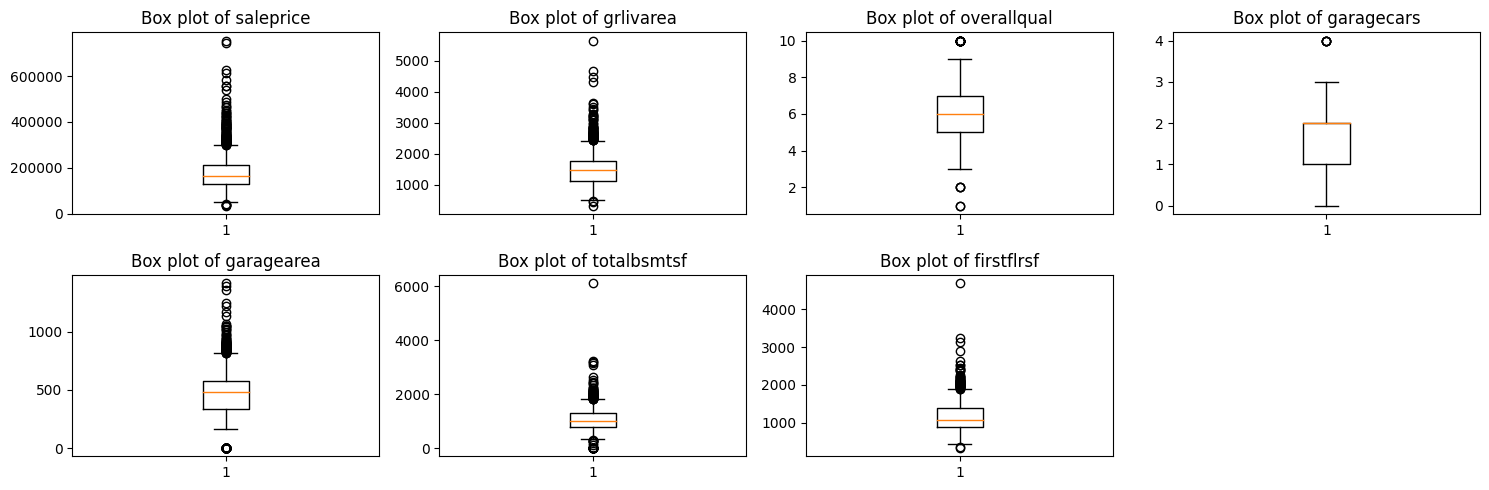

In [28]:
plt.figure(figsize = (15,5))

plt.subplot(2,4,1)
plt.boxplot(df["saleprice"], whis = 1)
plt.title("Box plot of saleprice")

plt.subplot(2,4,2)
plt.boxplot(df["grlivarea"], whis = 1)
plt.title("Box plot of grlivarea")

plt.subplot(2,4,3)
plt.boxplot(df["overallqual"], whis = 1)
plt.title("Box plot of overallqual")

plt.subplot(2,4,4)
plt.boxplot(df["garagecars"], whis = 1)
plt.title("Box plot of garagecars")

plt.subplot(2,4,5)
plt.boxplot(df["garagearea"], whis = 1)
plt.title("Box plot of garagearea")

plt.subplot(2,4,6)
plt.boxplot(df["totalbsmtsf"], whis = 1)
plt.title("Box plot of totalbsmtsf")

plt.subplot(2,4,7)
plt.boxplot(df["firstflrsf"], whis = 1)
plt.title("Box plot of firstflrsf")


plt.tight_layout()
plt.show()

In [29]:
from scipy.stats.mstats import winsorize

winsorized_saleprice = winsorize(df["saleprice"], (0.05, 0.10))
winsorized_grlivarea = winsorize(df['grlivarea'], (0.05, 0.10))
winsorized_overallqual = winsorize(df['overallqual'], (0.05, 0.10))
winsorized_garagecars = winsorize(df['garagecars'], (0.00, 0.05))
winsorized_garagearea = winsorize(df['garagearea'], (0.05, 0.10))
winsorized_totalbsmtsf = winsorize(df['totalbsmtsf'], (0.10, 0.10))
winsorized_firstflrsf = winsorize(df['firstflrsf'], (0.10, 0.10))

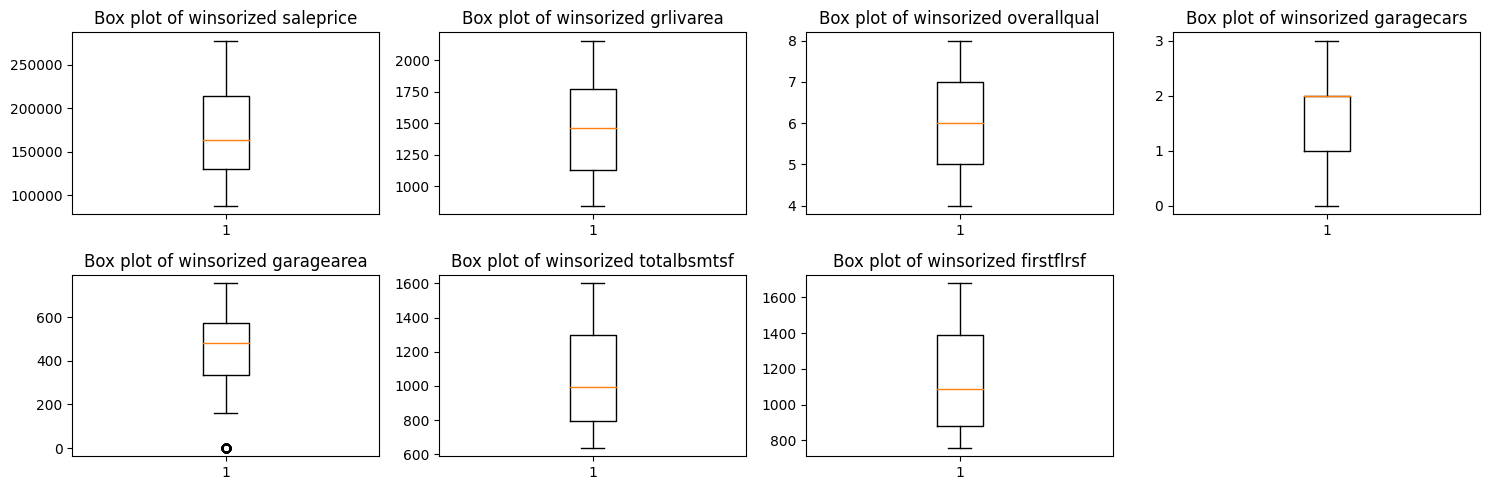

In [30]:
plt.figure(figsize = (15,5))

plt.subplot(2,4,1)
plt.boxplot(winsorized_saleprice, whis = 1)
plt.title("Box plot of winsorized saleprice")

plt.subplot(2,4,2)
plt.boxplot(winsorized_grlivarea, whis = 1)
plt.title("Box plot of winsorized grlivarea")

plt.subplot(2,4,3)
plt.boxplot(winsorized_overallqual, whis = 1)
plt.title("Box plot of winsorized overallqual")

plt.subplot(2,4,4)
plt.boxplot(winsorized_garagecars, whis = 1)
plt.title("Box plot of winsorized garagecars")

plt.subplot(2,4,5)
plt.boxplot(winsorized_garagearea, whis = 1)
plt.title("Box plot of winsorized garagearea")

plt.subplot(2,4,6)
plt.boxplot(winsorized_totalbsmtsf, whis = 1)
plt.title("Box plot of winsorized totalbsmtsf")

plt.subplot(2,4,7)
plt.boxplot(winsorized_firstflrsf, whis = 1)
plt.title("Box plot of winsorized firstflrsf")

plt.tight_layout()
plt.show()

In [31]:
df1 = df.copy()

df1['winsorized_saleprice'] = winsorized_saleprice
df1['winsorized_grlivarea'] = winsorized_grlivarea
df1['winsorized_overallqual'] = winsorized_overallqual
df1['winsorized_garagecars'] = winsorized_garagecars
df1['winsorized_garagearea'] = winsorized_garagearea
df1['winsorized_totalbsmtsf'] = winsorized_totalbsmtsf
df1['winsorized_firstflrsf'] = winsorized_firstflrsf

In [32]:
df_win = df1[['winsorized_saleprice', 'winsorized_grlivarea', 'winsorized_overallqual', 'winsorized_garagecars', 'winsorized_garagearea', 'winsorized_totalbsmtsf', 'winsorized_firstflrsf', 'fullbath']].copy()

In [33]:
df[['saleprice', 'grlivarea', 'overallqual', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath']].describe()

,saleprice,grlivarea,overallqual,garagecars,garagearea,totalbsmtsf,firstflrsf,fullbath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,6.099315,1.767123,472.980137,1057.429452,1162.626712,1.565068
std,79442.502883,525.480383,1.382997,0.747315,213.804841,438.705324,386.587738,0.550916
min,34900.000000,334.000000,1.000000,0.000000,0.000000,0.000000,334.000000,0.000000
25%,129975.000000,1129.500000,5.000000,1.000000,334.500000,795.750000,882.000000,1.000000
50%,163000.000000,1464.000000,6.000000,2.000000,480.000000,991.500000,1087.000000,2.000000
75%,214000.000000,1776.750000,7.000000,2.000000,576.000000,1298.250000,1391.250000,2.000000
max,755000.000000,5642.000000,10.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000


In [34]:
df_win.describe()

,winsorized_saleprice,winsorized_grlivarea,winsorized_overallqual,winsorized_garagecars,winsorized_garagearea,winsorized_totalbsmtsf,winsorized_firstflrsf,fullbath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,173712.178767,1476.223973,6.067123,1.763699,461.000685,1053.256164,1147.692466,1.565068
std,57101.604763,408.077236,1.225003,0.739318,189.798423,313.888917,305.993620,0.550916
min,88000.000000,848.000000,4.000000,0.000000,0.000000,637.000000,757.000000,0.000000
25%,129975.000000,1129.500000,5.000000,1.000000,334.500000,795.750000,882.000000,1.000000
50%,163000.000000,1464.000000,6.000000,2.000000,480.000000,991.500000,1087.000000,2.000000
75%,214000.000000,1776.750000,7.000000,2.000000,576.000000,1298.250000,1391.250000,2.000000
max,278000.000000,2158.000000,8.000000,3.000000,757.000000,1602.000000,1680.000000,3.000000


* Winsorization has affected the mean of each variable

array([[<AxesSubplot:title={'center':'winsorized_saleprice'}>,
        <AxesSubplot:title={'center':'winsorized_grlivarea'}>,
        <AxesSubplot:title={'center':'winsorized_overallqual'}>],
       [<AxesSubplot:title={'center':'winsorized_garagecars'}>,
        <AxesSubplot:title={'center':'winsorized_garagearea'}>,
        <AxesSubplot:title={'center':'winsorized_totalbsmtsf'}>],
       [<AxesSubplot:title={'center':'winsorized_firstflrsf'}>,
        <AxesSubplot:title={'center':'fullbath'}>, <AxesSubplot:>]],
      dtype=object)

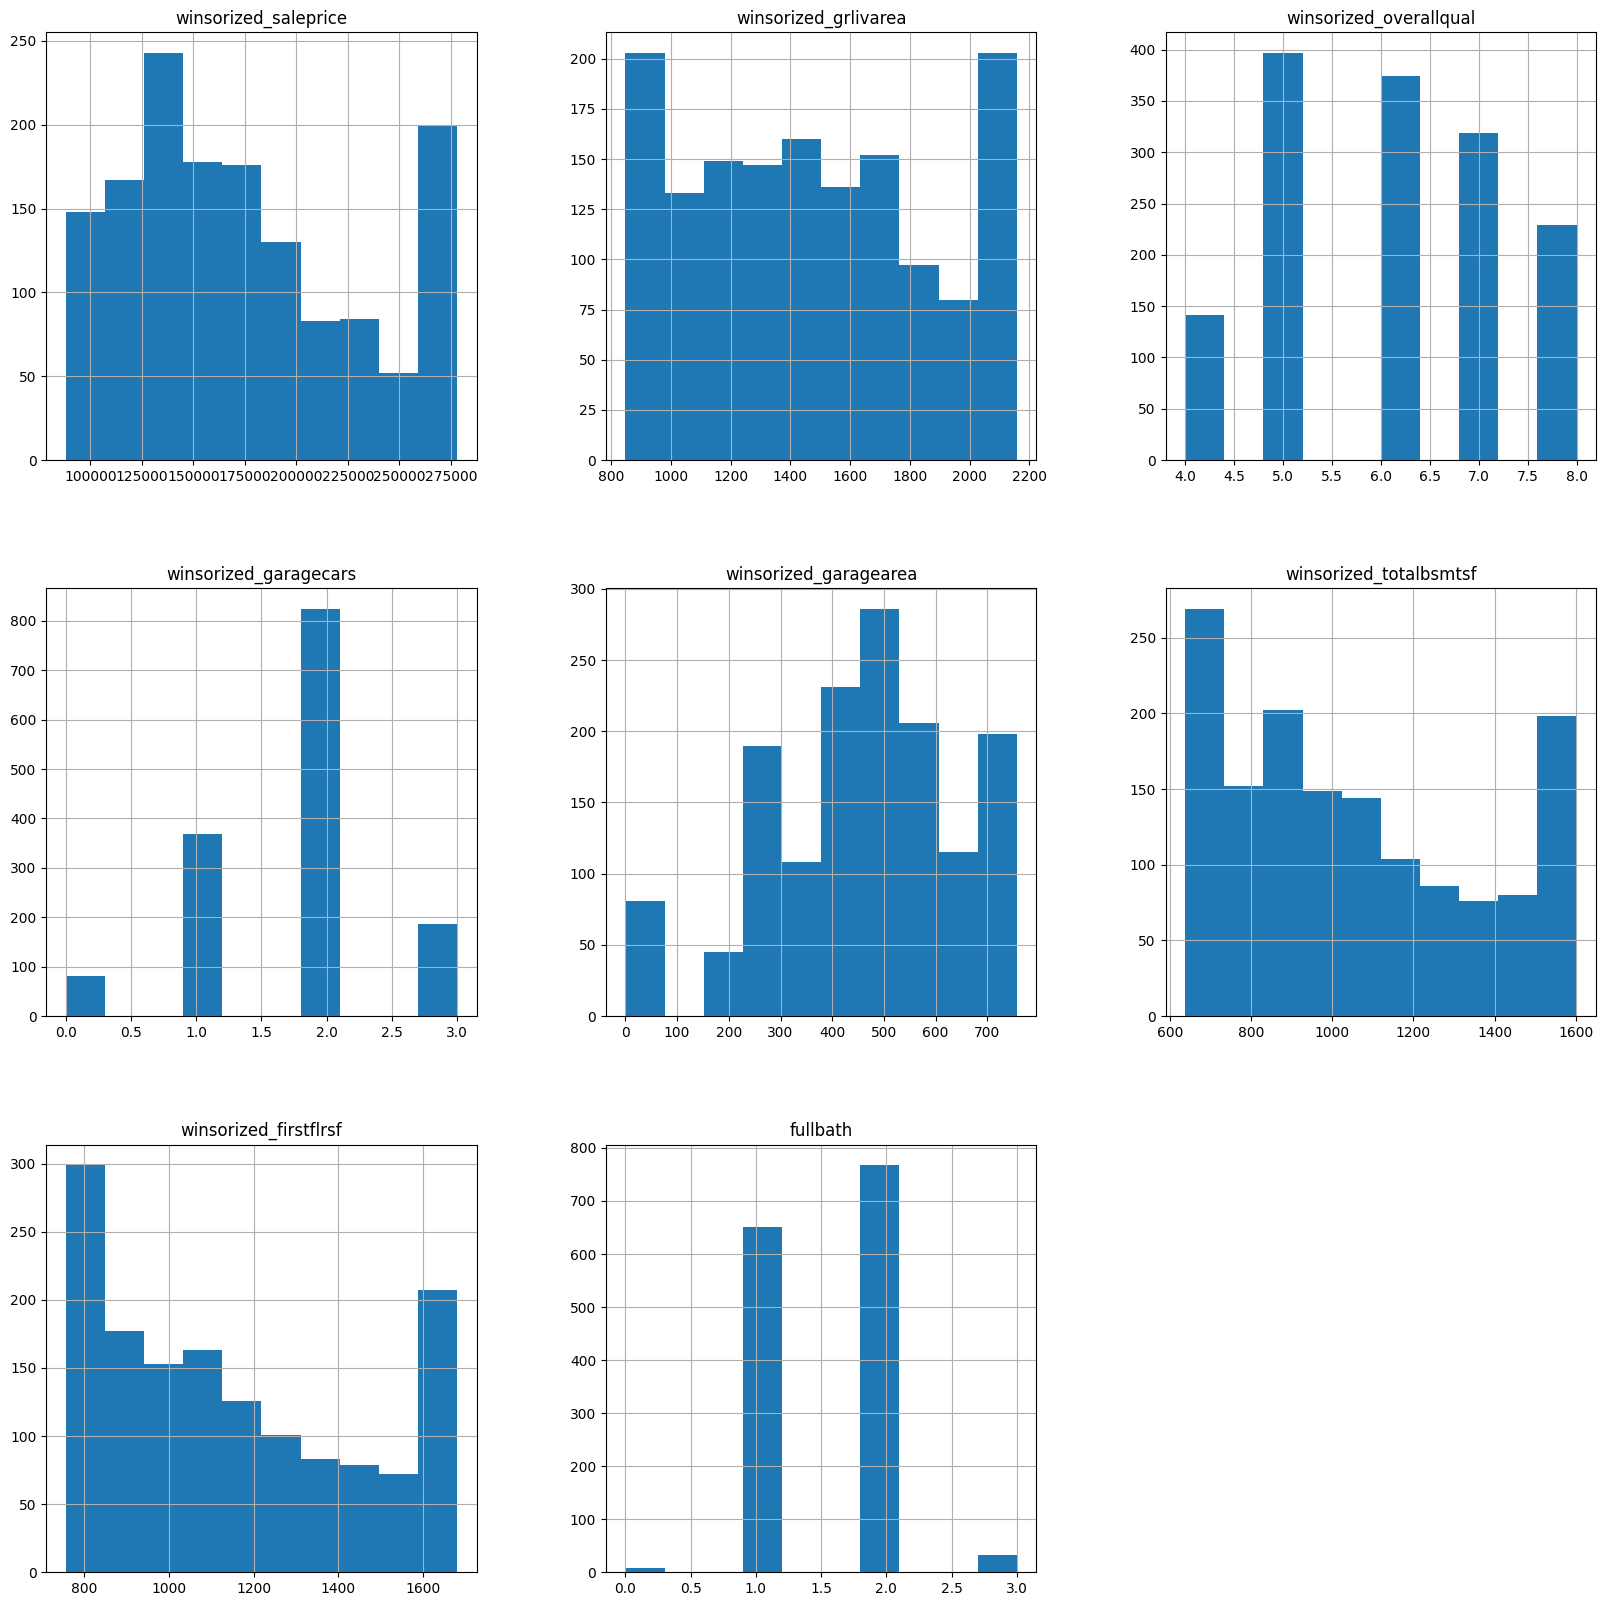

In [35]:
df_win.hist(figsize = (20,20))

In [36]:
features = ['winsorized_saleprice', 'winsorized_grlivarea', 'winsorized_overallqual', 'winsorized_garagecars', 'winsorized_garagearea', 'winsorized_totalbsmtsf', 'winsorized_firstflrsf', 'fullbath']

### * Target Vs Continuous (Features)

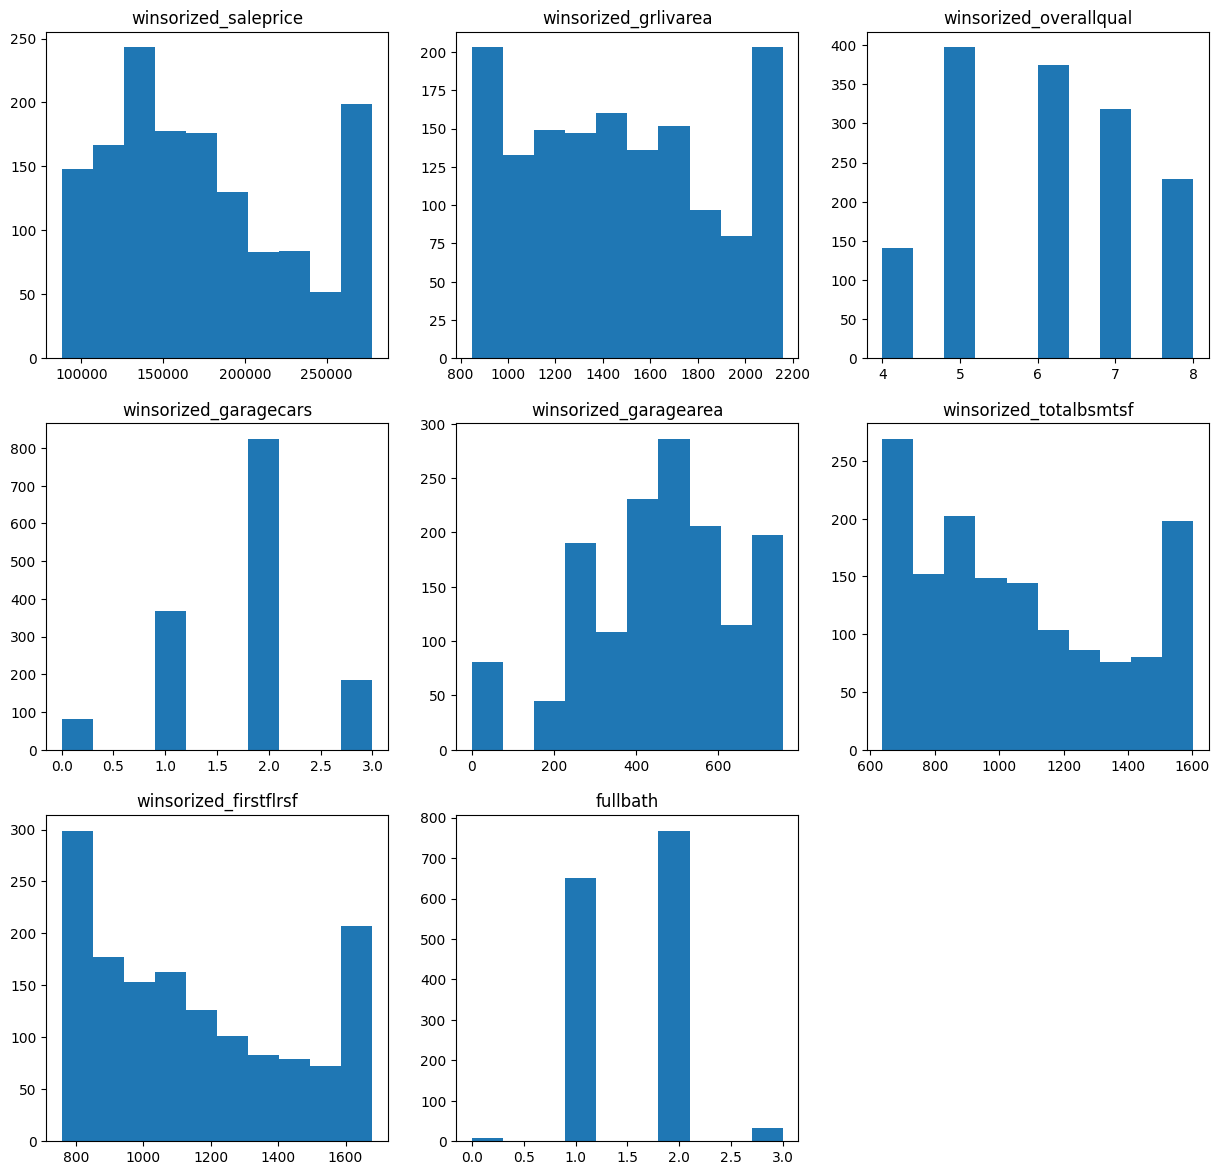

In [37]:
plt.figure(figsize = (15,50))

for i in range(len(features)):
    plt.subplot(10,3,i+1)
    plt.hist(df_win[features[i]])
    plt.title(features[i])

plt.show()

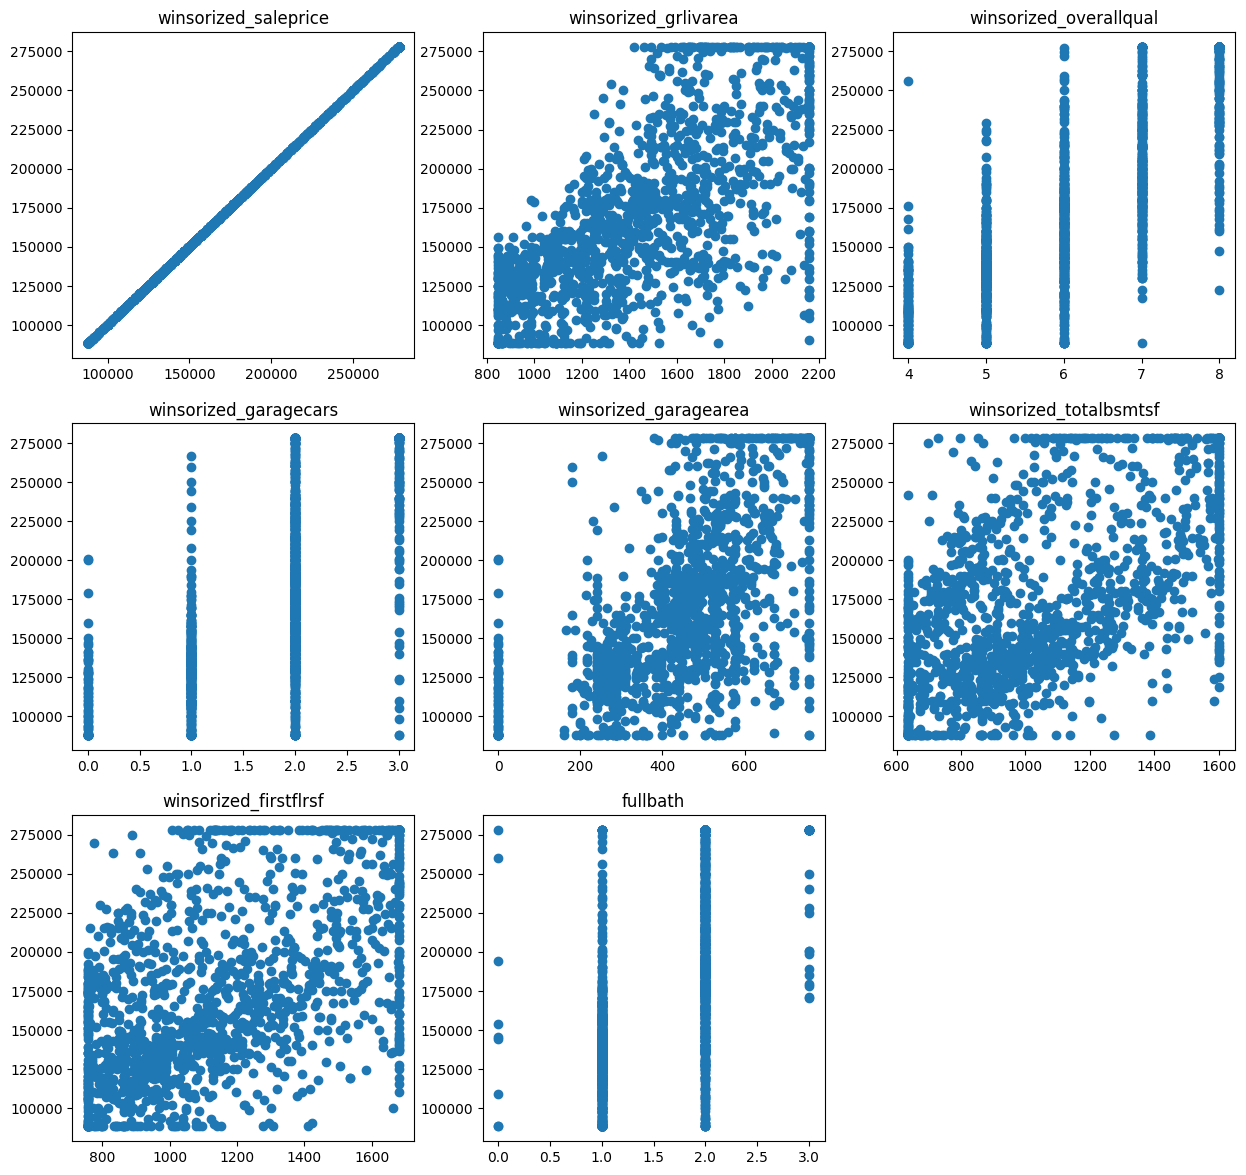

In [38]:
plt.figure(figsize=(15,50))

for i in range(len(features)):
    plt.subplot(10,3,i+1)
    plt.scatter(df_win[features[i]], y = df_win['winsorized_saleprice'])
    plt.title(features[i])

plt.show()

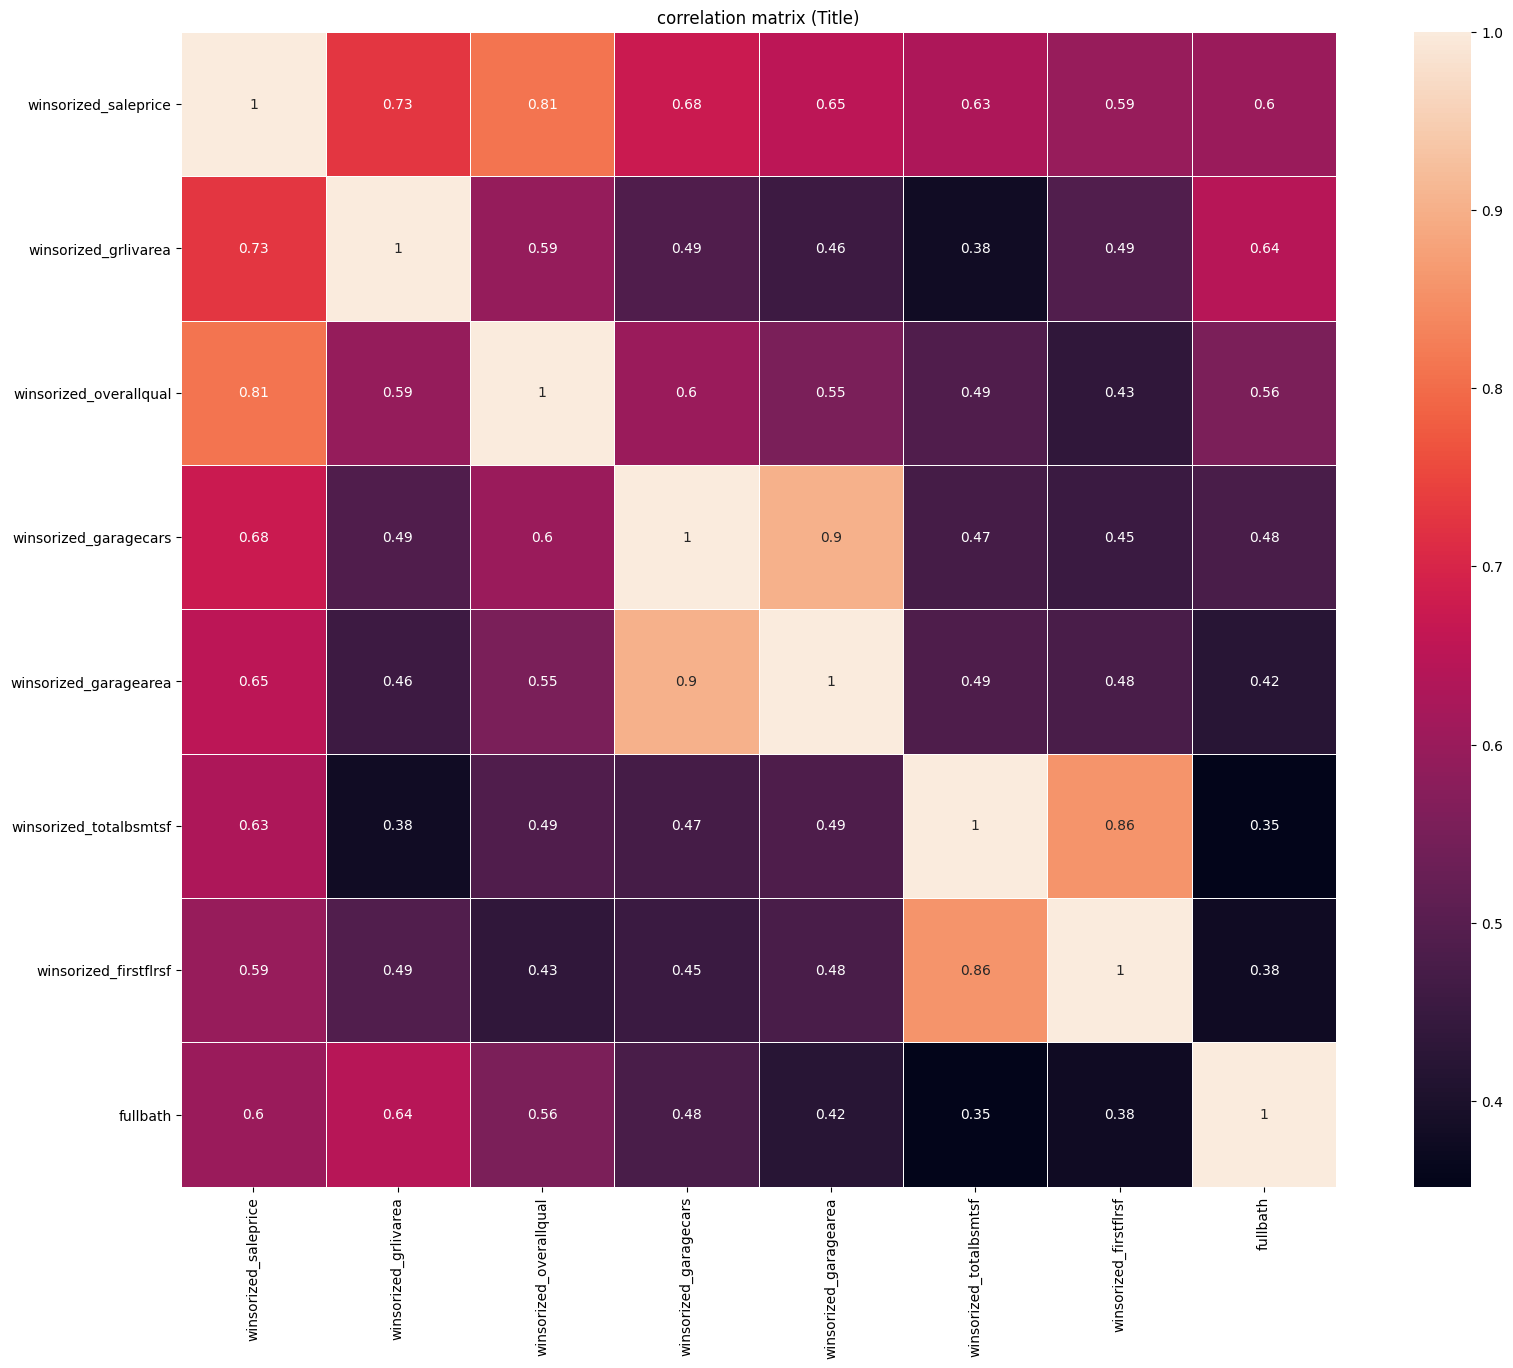

In [39]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(df_win[features].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Title)")
plt.show()

* Several features are highly corelated to each other (>85%) and can be removed. They are as follows:

* garagecars and garagearea
* totalbsmtsf and firstflrsf

* I'll remove garagearea and firstflrsf

In [40]:
df_win.drop(['winsorized_garagearea', 'winsorized_firstflrsf'], axis=1, inplace=True)

### * Target Vs Categorical Variables

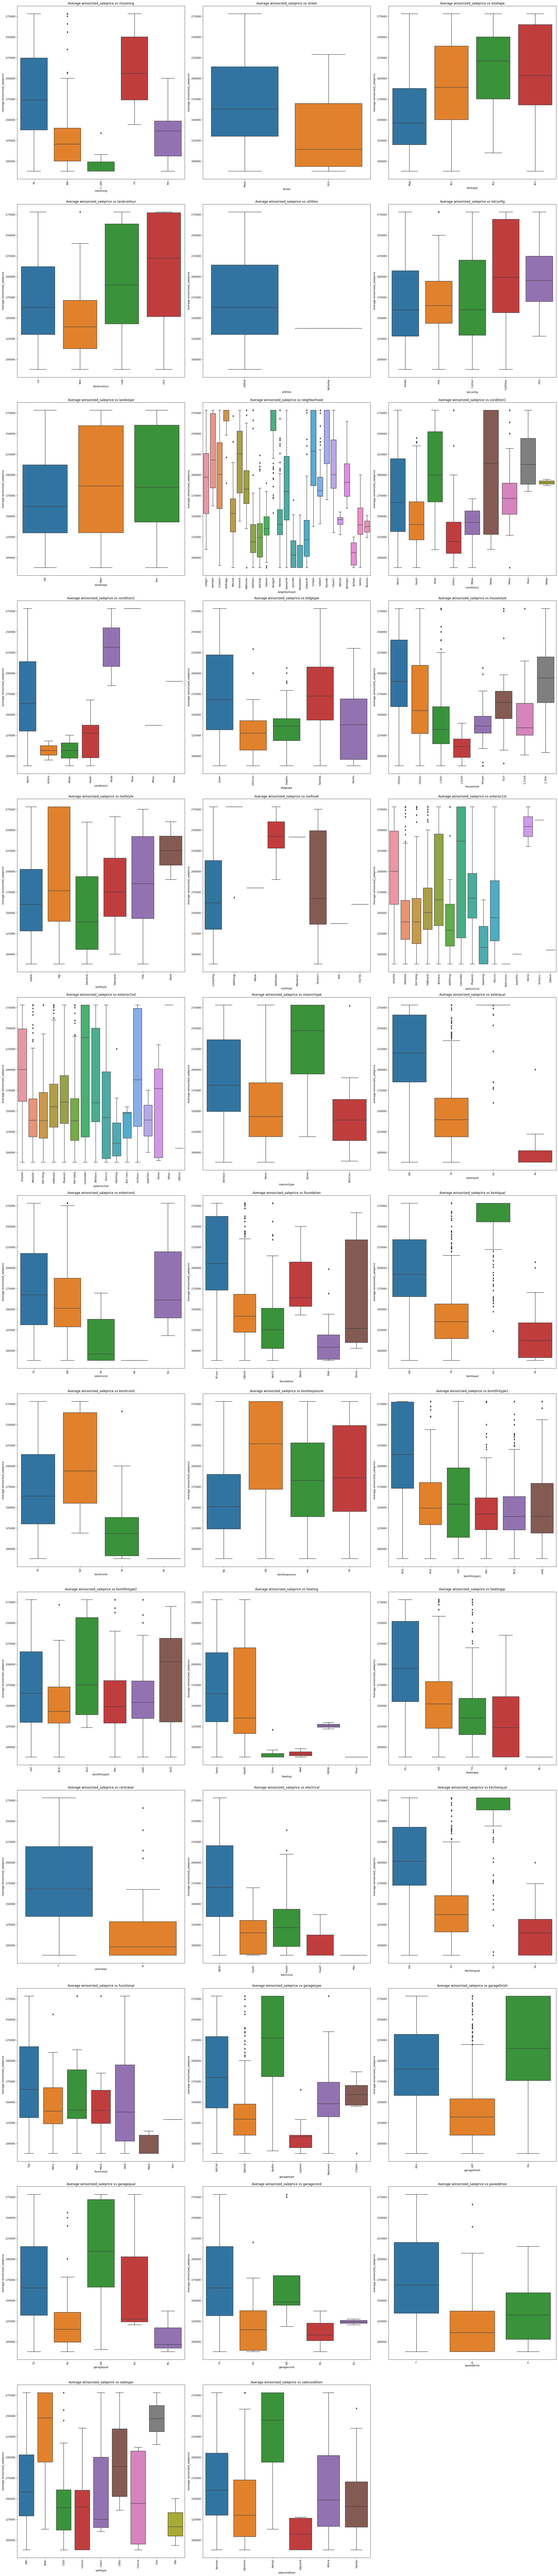

In [41]:
import seaborn as sns
plt.figure(figsize=(30,350))

for i, column in enumerate(categorical_columns):
    plt.subplot(33,3,i+1)
    sns.boxplot(df[column],df_win["winsorized_saleprice"])
    plt.title(f"Average winsorized_saleprice vs {column}")
    plt.ylabel("Average winsorized_saleprice")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [42]:
df_cat = df1.copy()

cat_var = ['winsorized_saleprice', 'mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'saletype', 'salecondition']

In [43]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
for i in cat_var:
    df_cat[i]= label_encoder.fit_transform(df_cat[i]) 

In [44]:
df_cat[cat_var].corr().loc[:,"winsorized_saleprice"].sort_values(ascending=False)

winsorized_saleprice    1.000000
foundation              0.436398
centralair              0.297609
electrical              0.279271
paveddrive              0.268340
salecondition           0.232578
housestyle              0.231991
neighborhood            0.178250
garagecond              0.162150
roofstyle               0.150359
exterior2nd             0.141010
garagequal              0.136871
extercond               0.135919
exterior1st             0.134885
functional              0.129811
condition1              0.125140
roofmatl                0.098632
landslope               0.059477
bsmtcond                0.054109
street                  0.041730
bsmtfintype2            0.029512
landcontour             0.024805
condition2              0.006584
utilities              -0.017557
masvnrtype             -0.021774
saletype               -0.027277
lotconfig              -0.071732
bldgtype               -0.073497
bsmtfintype1           -0.100907
heating                -0.122579
mszoning  

In [45]:
cat_var1 = ['winsorized_saleprice', 'foundation', 'centralair', 'electrical', 'paveddrive', 'salecondition', 'housestyle', 'neighborhood']

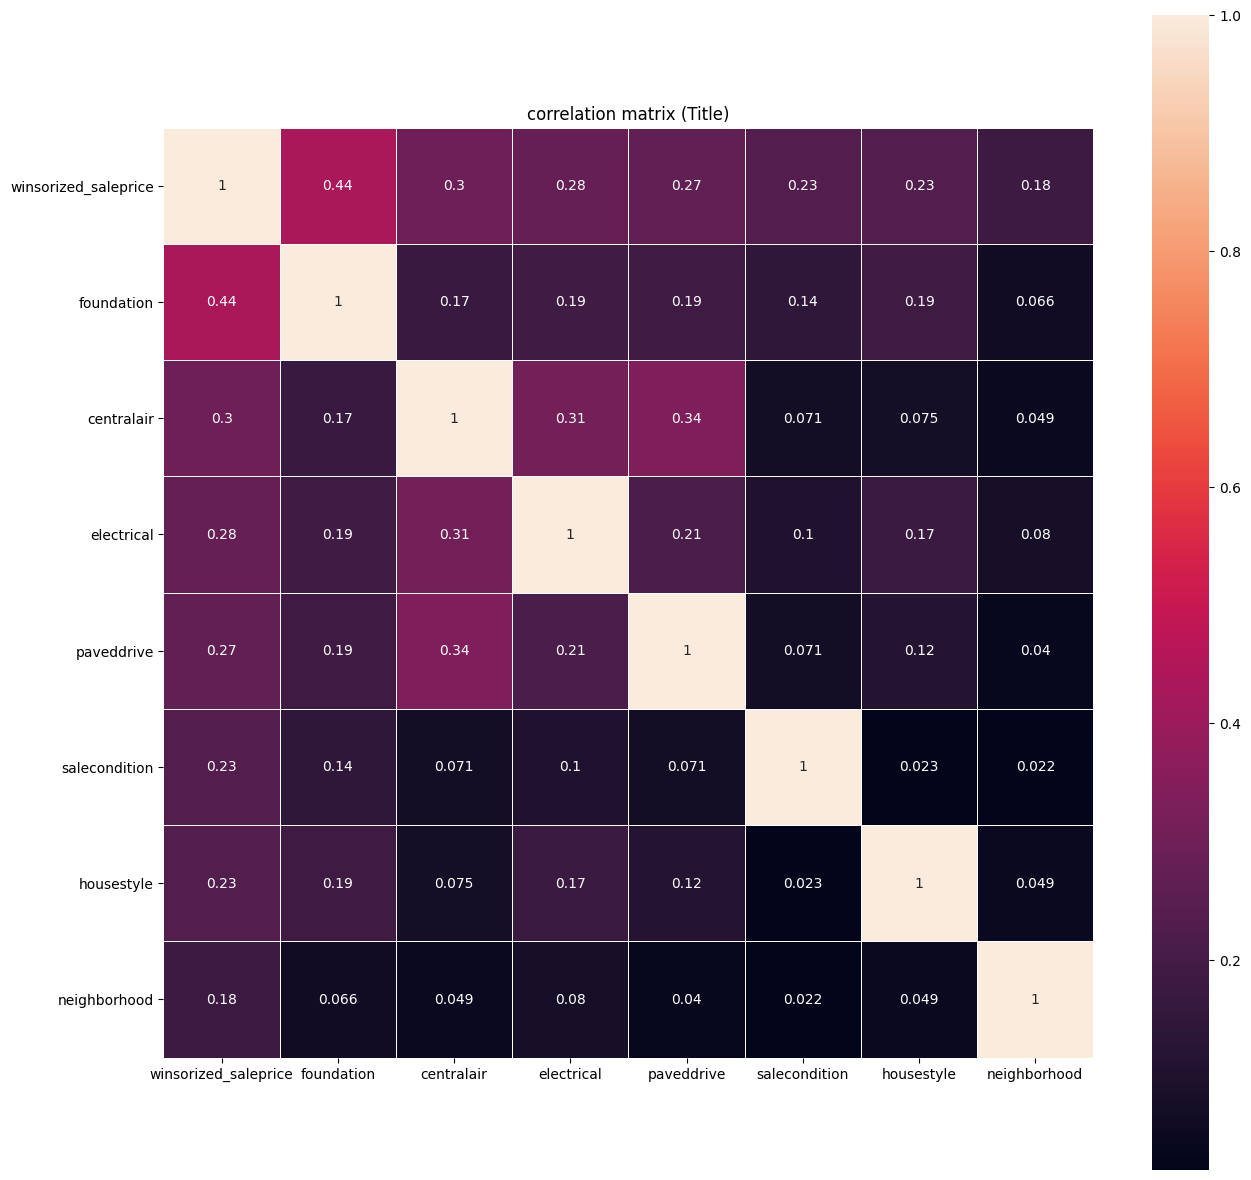

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cat[cat_var1].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Title)")
plt.show()

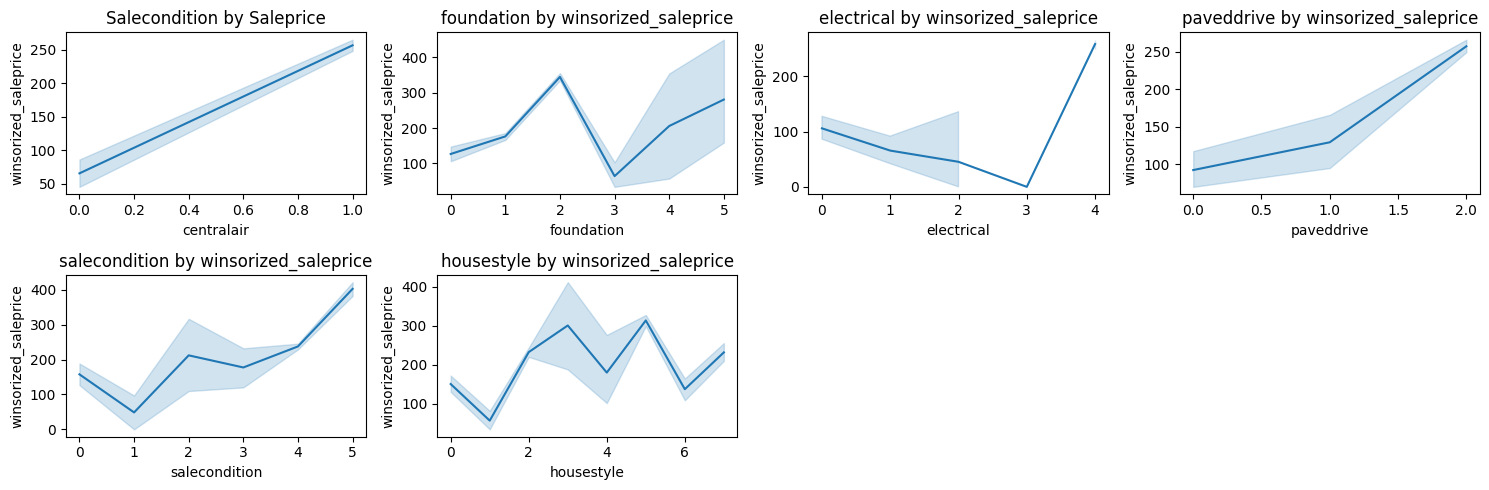

In [47]:
plt.figure(figsize = (15,5))

plt.subplot(2,4,1)
ax = sns.lineplot(x="centralair", y="winsorized_saleprice",data=df_cat)
plt.title('Salecondition by Saleprice')

plt.subplot(2,4,2)
ax = sns.lineplot(x="foundation", y="winsorized_saleprice",data=df_cat)
plt.title('foundation by winsorized_saleprice')

plt.subplot(2,4,3)
ax = sns.lineplot(x="electrical", y="winsorized_saleprice",data=df_cat)
plt.title('electrical by winsorized_saleprice')

plt.subplot(2,4,4)
ax = sns.lineplot(x="paveddrive", y="winsorized_saleprice",data=df_cat)
plt.title('paveddrive by winsorized_saleprice')

plt.subplot(2,4,5)
ax = sns.lineplot(x="salecondition", y="winsorized_saleprice",data=df_cat)
plt.title('salecondition by winsorized_saleprice')

plt.subplot(2,4,6)
ax = sns.lineplot(x="housestyle", y="winsorized_saleprice",data=df_cat)
plt.title('housestyle by winsorized_saleprice')

plt.tight_layout()
plt.show()

### * Feature Selection

* The following continuous variables will be used: grlivarea, overallqual, garagecars, totalbsmtsf, and fullbath
* The following categorica variables will be used: centralair, paveddrive, and salecondition

# Build model and est. parameters using OLS

In [48]:
label_encoder = preprocessing.LabelEncoder() 
   
df1['centralair']= label_encoder.fit_transform(df1['centralair']) 
df1['paveddrive']= label_encoder.fit_transform(df1['paveddrive'])
df1['salecondition']= label_encoder.fit_transform(df1['salecondition'])

In [49]:
Y = df1['winsorized_saleprice']

X = df1[['centralair','paveddrive','salecondition','winsorized_grlivarea','winsorized_overallqual','winsorized_garagecars','winsorized_totalbsmtsf','fullbath']]


lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [15250.16367641  3600.35934768  3276.08159636    45.37886359
 17764.97224015 10715.09501106    40.54255028  1702.82473061]

Intercept: 
 -98617.73105290552


In [50]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.830
Model:                              OLS   Adj. R-squared:                  0.829
Method:                   Least Squares   F-statistic:                     887.8
Date:                  Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                          17:01:04   Log-Likelihood:                -16767.
No. Observations:                  1460   AIC:                         3.355e+04
Df Residuals:                      1451   BIC:                         3.360e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -9.862e+04   4291.761    -22.978      0.000   -1.07e+05   -9.02e+04
centralair              1.525e+04   2721.851      5.603      0.000    9910.980    2.06e+04
paveddrive              3600.3593   1366.309      2.635      0.009     920.208    6280.511
salecondition           3276.0816    575.088      5.697      0.000    2147.989    4404.174
winsorized_grlivarea      45.3789      2.169     20.926      0.000      41.125      49.633
winsorized_overallqual  1.776e+04    743.935     23.880      0.000    1.63e+04    1.92e+04
winsorized_garagecars   1.072e+04   1133.750      9.451      0.000    8491.130    1.29e+04
winsorized_totalbsmtsf    40.5426      2.348     17.270      0.000      35.938      45.147
fullbath                1702.8247   1544.988      1.102      0.271   -1327.823    4733.473
==============================================================================
Omnibus:                      113.323   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.227
Skew:                          -0.488   Prob(JB):                     2.52e-53
Kurtosis:                       4.740   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The fullbath P value is >0.05. It will be removed and the model run again.

In [51]:
Y = df1['winsorized_saleprice']

X = df1[['centralair','paveddrive','salecondition','winsorized_grlivarea','winsorized_overallqual','winsorized_garagecars','winsorized_totalbsmtsf']]


lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.830
Model:                              OLS   Adj. R-squared:                  0.829
Method:                   Least Squares   F-statistic:                     1014.
Date:                  Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                          17:01:04   Log-Likelihood:                -16767.
No. Observations:                  1460   AIC:                         3.355e+04
Df Residuals:                      1452   BIC:                         3.359e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -9.885e+04   4287.000    -23.058      0.000   -1.07e+05   -9.04e+04
centralair              1.517e+04   2721.003      5.574      0.000    9829.347    2.05e+04
paveddrive              3625.6893   1366.216      2.654      0.008     945.721    6305.658
salecondition           3306.5517    574.465      5.756      0.000    2179.681    4433.422
winsorized_grlivarea      46.4323      1.947     23.852      0.000      42.614      50.251
winsorized_overallqual  1.792e+04    731.160     24.504      0.000    1.65e+04    1.94e+04
winsorized_garagecars   1.086e+04   1125.827      9.649      0.000    8654.918    1.31e+04
winsorized_totalbsmtsf    40.6134      2.347     17.306      0.000      36.010      45.217
==============================================================================
Omnibus:                      112.699   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.148
Skew:                          -0.491   Prob(JB):                     3.19e-52
Kurtosis:                       4.713   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

The number of observations in training set is 1168
The number of observations in test set is 292


In [53]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

X_train = sm.add_constant(X_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.832443782728942
-----Test set statistics-----
R-squared of the model in the test set is: 0.8203143478872206
Mean absolute error of the prediction is: 18860.12016441688
Mean squared error of the prediction is: 602233335.2200133
Root mean squared error of the prediction is: 24540.44284889768
Mean absolute percentage error of the prediction is: 11.937584372865857


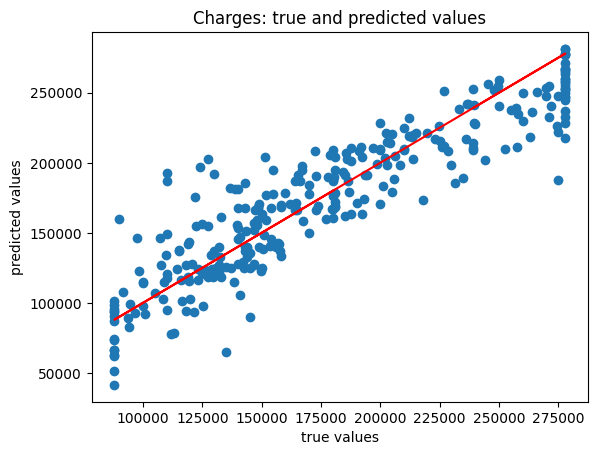

Mean absolute error of the prediction is: 18744.90979508146
Mean squared error of the prediction is: 597448360.2424058
Root mean squared error of the prediction is: 24442.756805287037
Mean absolute percentage error of the prediction is: 11.862859242957713


In [54]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# * Lasso

In [55]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_train, y_train)

X_train = sm.add_constant(X_train)


y_preds_train = lasso_model.predict(X_train)
y_preds_test = lasso_model.predict(X_test)

print("Best alpha value is: {}".format(lasso_model.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8324437827289419
-----Test set statistics-----
R-squared of the model in test set is: 0.8203143478872209
Mean absolute error of the prediction is: 18860.12016441685
Mean squared error of the prediction is: 602233335.220012
Root mean squared error of the prediction is: 24540.442848897652
Mean absolute percentage error of the prediction is: 11.937584372865853


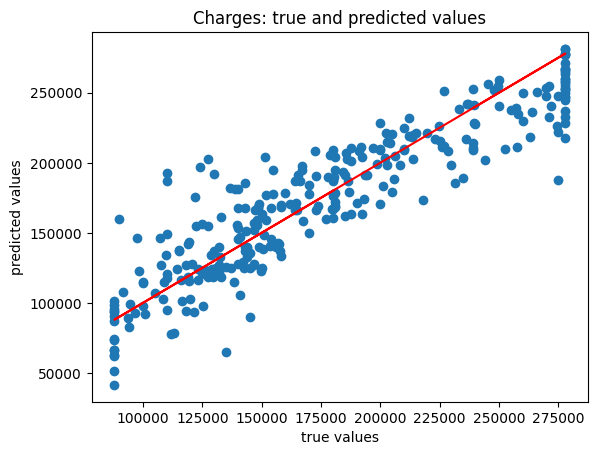

Mean absolute error of the prediction is: 18744.90979508146
Mean squared error of the prediction is: 597448360.2424058
Root mean squared error of the prediction is: 24442.756805287037
Mean absolute percentage error of the prediction is: 11.862859242957713


In [56]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# * Ridge

In [57]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

X_train = sm.add_constant(X_train)

y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.8324426414669167
-----Test set statistics-----
R-squared of the model in test set is: 0.8203889061900147
Mean absolute error of the prediction is: 18854.678323753236
Mean squared error of the prediction is: 601983446.067306
Root mean squared error of the prediction is: 24535.35094648752
Mean absolute percentage error of the prediction is: 11.932407221172756


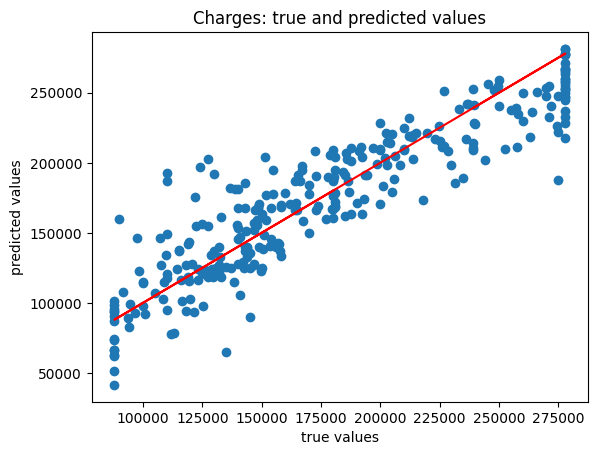

Mean absolute error of the prediction is: 18744.90979508146
Mean squared error of the prediction is: 597448360.2424058
Root mean squared error of the prediction is: 24442.756805287037
Mean absolute percentage error of the prediction is: 11.862859242957713


In [58]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# * ElasticNet

In [59]:
elasticNet_model = ElasticNetCV(alphas=alphas, cv=5) 
elasticNet_model.fit(X_train, y_train)

X_train = sm.add_constant(X_train)

y_preds_train = elasticNet_model.predict(X_train)
y_preds_test = elasticNet_model.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticNet_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticNet_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.8324099163786285
-----Test set statistics-----
R-squared of the model on the test set is: 0.8206951774135192
Mean absolute error of the prediction is: 18830.112047316183
Mean squared error of the prediction is: 600956949.3034064
Root mean squared error of the prediction is: 24514.423291266845
Mean absolute percentage error of the prediction is: 11.909057909835997


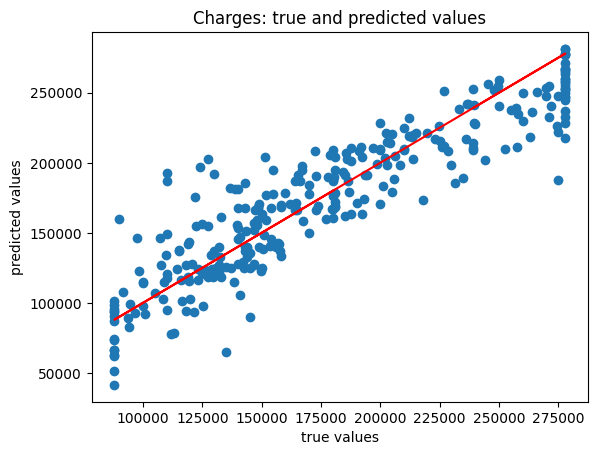

Mean absolute error of the prediction is: 18744.90979508146
Mean squared error of the prediction is: 597448360.2424058
Root mean squared error of the prediction is: 24442.756805287037
Mean absolute percentage error of the prediction is: 11.862859242957713


In [60]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### There's no significant change across all models in the R^2 values or MAE, MSE, RMSE, or MAPE values.

* I choose the OLS model for simplicity.

# Integrate other useful features

* I will integrate data from the dataset "Federal Reserve Interest Rates, 1954-Present"
* Available at https://www.kaggle.com/datasets/federalreserve/interest-rates?resource=download
* The date variable will be converted to datetime
* Null values will be filled via interpolation because it's a timeseries dataset

In [69]:
interest = pd.read_csv(r"C:\Users\jph41\Downloads\archive\index.csv", parse_dates=True)
idf = interest.copy()
idf.columns = idf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_').str.replace('(', '').str.replace(')', '')

idf['date'] = pd.to_datetime(idf.year*10000+idf.month*100+idf.day,format='%Y%m%d')
idf2 =idf.copy()
idf2.set_index('date',inplace=True)

idf2 = idf2.interpolate(method='time')

In [70]:
features = idf2.loc[:,['year','effective_federal_funds_rate','inflation_rate']]
by_year = features.groupby('year')

economic_feat= by_year.mean()

* The new data will be merged with the houseprice dataset by year_sold

In [73]:
economic_feat['yrsold'] = economic_feat.index

df1['yrsold'] = df['yrsold'].astype('int')
df1 = pd.merge(df1, economic_feat)

df1.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,saleprice,winsorized_saleprice,winsorized_grlivarea,winsorized_overallqual,winsorized_garagecars,winsorized_garagearea,winsorized_totalbsmtsf,winsorized_firstflrsf,effective_federal_funds_rate,inflation_rate
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,208500,208500,1710,7,2,548,856,856,1.858998,2.260441
1,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,223500,223500,1786,7,2,608,920,920,1.858998,2.260441
2,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,250000,250000,2158,8,3,757,1145,1145,1.858998,2.260441
3,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,129900,129900,1774,7,2,468,952,1022,1.858998,2.260441
4,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,118000,118000,1077,5,1,205,991,1077,1.858998,2.260441


In [74]:
Y = df1['winsorized_saleprice']

X = df1[['centralair','paveddrive','salecondition','winsorized_grlivarea','winsorized_overallqual','winsorized_garagecars','winsorized_totalbsmtsf','effective_federal_funds_rate','inflation_rate']]


lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.830
Model:                              OLS   Adj. R-squared:                  0.829
Method:                   Least Squares   F-statistic:                     788.0
Date:                  Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                          19:05:36   Log-Likelihood:                -16767.
No. Observations:                  1460   AIC:                         3.355e+04
Df Residuals:                      1450   BIC:                         3.361e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.005e+05   5537.150    -18.146      0.000   -1.11e+05   -8.96e+04
centralair                    1.516e+04   2723.015      5.569      0.000    9822.365    2.05e+04
paveddrive                    3651.1059   1367.861      2.669      0.008     967.907    6334.304
salecondition                 3309.2969    574.961      5.756      0.000    2181.453    4437.141
winsorized_grlivarea            46.4343      1.948     23.837      0.000      42.613      50.255
winsorized_overallqual        1.791e+04    732.027     24.462      0.000    1.65e+04    1.93e+04
winsorized_garagecars         1.085e+04   1126.870      9.630      0.000    8640.958    1.31e+04
winsorized_totalbsmtsf          40.6364      2.349     17.301      0.000      36.029      45.244
effective_federal_funds_rate   -49.7169    489.029     -0.102      0.919   -1008.996     909.563
inflation_rate                 865.3082   2160.984      0.400      0.689   -3373.681    5104.297
==============================================================================
Omnibus:                      112.942   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.261
Skew:                          -0.492   Prob(JB):                     3.02e-52
Kurtosis:                       4.712   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

The number of observations in training set is 1168
The number of observations in test set is 292


In [76]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

X_train = sm.add_constant(X_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8313627246061135
-----Test set statistics-----
R-squared of the model in the test set is: 0.8244072063607981
Mean absolute error of the prediction is: 17852.57189155949
Mean squared error of the prediction is: 568810534.3813053
Root mean squared error of the prediction is: 23849.74914713581
Mean absolute percentage error of the prediction is: 11.423810416260874


### All parameters improved slightly with the addition of the new economic features. The addition of the economic variables makes for a more robust model.